In [6]:
import numpy as np
import matplotlib.pyplot as plt

MODEL SIMULATION
Grid size: 20 x 20 = 400 spins


Running simulation for β = 0.2 (HOT temperature)
Initial energy: -32.0
Initial magnetization: 0.005
  Iteration 100: E = -156.0, M = -0.100
  Iteration 500: E = -164.0, M = -0.075
  Iteration 1000: E = -196.0, M = 0.015
Final energy: -196.0
Final magnetization: 0.015

Running simulation for β = 0.4 (MEDIUM temperature)
Initial energy: 36.0
Initial magnetization: -0.025
  Iteration 100: E = -452.0, M = 0.320
  Iteration 500: E = -492.0, M = 0.610
  Iteration 1000: E = -424.0, M = 0.540
Final energy: -424.0
Final magnetization: 0.540

Running simulation for β = 0.6 (COLD temperature)
Initial energy: -16.0
Initial magnetization: 0.005
  Iteration 100: E = -756.0, M = 0.970
  Iteration 500: E = -756.0, M = 0.970
  Iteration 1000: E = -732.0, M = 0.945
Final energy: -732.0
Final magnetization: 0.945

Creating plots

Creating energy plot...


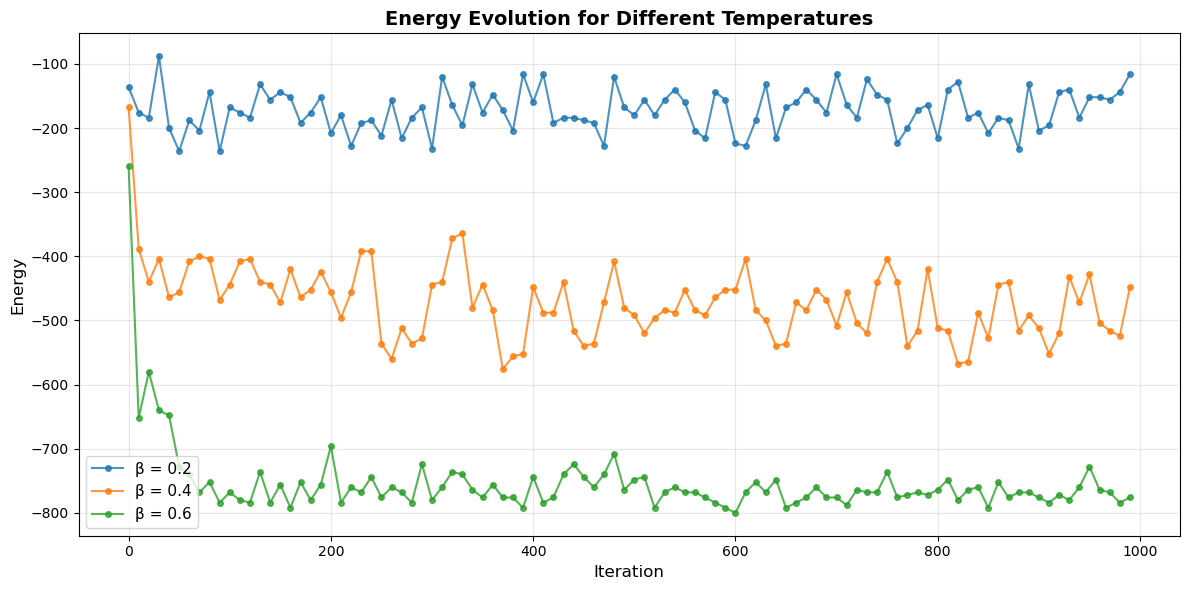

q2_energy.pdf'

Creating magnetization plot


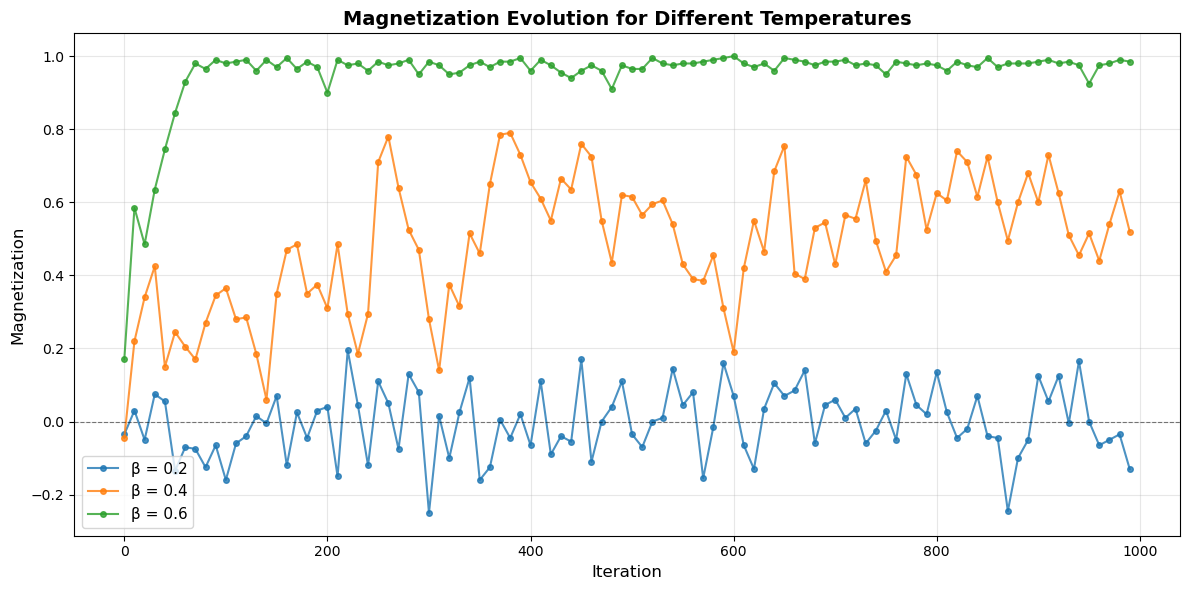

 q2_magnetization.pdf'

Creating grid state visualizations (PNG format)...
✓ Saved state_0.2_0.png
✓ Saved state_0.2_100.png
✓ Saved state_0.2_500.png
✓ Saved state_0.2_1000.png
✓ Saved state_0.4_0.png
✓ Saved state_0.4_100.png
✓ Saved state_0.4_500.png
✓ Saved state_0.4_1000.png
✓ Saved state_0.6_0.png
✓ Saved state_0.6_100.png
✓ Saved state_0.6_500.png
✓ Saved state_0.6_1000.png

plots r gucci

Files saved:
  - q2_energy.pdf
  - q2_magnetization.pdf
  PNG files:
  - state_0.2_0.png
  - state_0.2_100.png
  - state_0.2_500.png
  - state_0.2_1000.png
  - state_0.4_0.png
  - state_0.4_100.png
  - state_0.4_500.png
  - state_0.4_1000.png
  - state_0.6_0.png
  - state_0.6_100.png
  - state_0.6_500.png
  - state_0.6_1000.png


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# the Grid size
N = 20

print("="*60)
print("MODEL SIMULATION")
print("="*60)
print(f"Grid size: {N} x {N} = {N*N} spins")
print()

def calculate_energy(grid):
    """Calculate total energy of the system"""
    energy = 0
    for i in range(N):
        for j in range(N):
            spin = grid[i, j]
            neighbors = (grid[(i+1)%N, j] + grid[i-1, j] + 
                        grid[i, (j+1)%N] + grid[i, (j-1)%N])
            energy += -spin * neighbors
    return energy / 2

def gibbs_update(grid, beta):
    """Update one random site using Gibbs sampling"""
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)
    
    neighbors_sum = (grid[(i+1)%N, j] + grid[i-1, j] + 
                    grid[i, (j+1)%N] + grid[i, (j-1)%N])
    
    # Gibbs probability formula
    prob_spin_up = 1.0 / (1.0 + np.exp(-beta * 2 * neighbors_sum))
    
    if np.random.rand() < prob_spin_up:
        grid[i, j] = 1
    else:
        grid[i, j] = -1

def calculate_magnetization(grid):
    """Calculate average magnetization"""
    return np.mean(grid)

betas = [0.2, 0.4, 0.6]  
beta_names = {0.2: "HOT", 0.4: "MEDIUM", 0.6: "COLD"}

n_iterations = 1000
record_every = 10

results = {}

for beta in betas:
    print(f"\n{'='*60}")
    print(f"Running simulation for β = {beta} ({beta_names[beta]} temperature)")
    print(f"{'='*60}")
    
    # Initialize random grid
    grid = np.random.choice([-1, 1], size=(N, N))
    
    print(f"Initial energy: {calculate_energy(grid):.1f}")
    print(f"Initial magnetization: {calculate_magnetization(grid):.3f}")
    
    energies = []
    magnetizations = []
    iteration_numbers = []
    
    # Save states at specific iterations
    saved_states = {}
    save_at_iterations = [0, 100, 500, 1000]
    saved_states[0] = grid.copy()
    
    # Run Gibbs sampler
    for iteration in range(n_iterations):
        for _ in range(N * N):
            gibbs_update(grid, beta)
        
        # Record every 10 iterations
        if iteration % record_every == 0:
            energies.append(calculate_energy(grid))
            magnetizations.append(calculate_magnetization(grid))
            iteration_numbers.append(iteration)
        
        # Save specific states
        if iteration + 1 in save_at_iterations:
            saved_states[iteration + 1] = grid.copy()
            print(f"  Iteration {iteration+1}: E = {calculate_energy(grid):.1f}, M = {calculate_magnetization(grid):.3f}")
    
    results[beta] = {
        'energies': energies,
        'magnetizations': magnetizations,
        'iterations': iteration_numbers,
        'saved_states': saved_states
    }
    
    print(f"Final energy: {calculate_energy(grid):.1f}")
    print(f"Final magnetization: {calculate_magnetization(grid):.3f}")

print(f"\n{'='*60}")
print("Creating plots")
print(f"{'='*60}\n")

print("Creating energy plot...")
plt.figure(figsize=(12, 6))
for beta in betas:
    plt.plot(results[beta]['iterations'], 
             results[beta]['energies'], 
             marker='o', 
             markersize=4, 
             linewidth=1.5,
             label=f'β = {beta}',
             alpha=0.8)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Energy', fontsize=12)
plt.title('Energy Evolution for Different Temperatures', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('q2_energy.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("q2_energy.pdf'\n")

print("Creating magnetization plot")
plt.figure(figsize=(12, 6))
for beta in betas:
    plt.plot(results[beta]['iterations'], 
             results[beta]['magnetizations'], 
             marker='o', 
             markersize=4, 
             linewidth=1.5,
             label=f'β = {beta}',
             alpha=0.8)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Magnetization', fontsize=12)
plt.title('Magnetization Evolution for Different Temperatures', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
plt.tight_layout()
plt.savefig('q2_magnetization.pdf', dpi=300, bbox_inches='tight')
plt.show()

print(" q2_magnetization.pdf'\n")

print("Creating grid state visualizations (PNG format)...")
iterations_to_show = [0, 100, 500, 1000]

for beta in betas:
    for iteration in iterations_to_show:
        plt.figure(figsize=(6, 6))
        grid_state = results[beta]['saved_states'][iteration]
        
        plt.imshow(grid_state, cmap='binary', vmin=-1, vmax=1, interpolation='nearest')
        plt.colorbar()
        
        # Title format: "beta=X.X, iter=Y"
        plt.title(f'beta={beta}, iter={iteration}', fontsize=14, fontweight='bold')
        
        # Save with exact naming format from assignment
        filename = f'state_{beta}_{iteration}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.close()
        
        print(f"✓ Saved {filename}")

print(f"\n{'='*60}")
print("plots r gucci")
print(f"{'='*60}")
print("\nFiles saved:")
print("  - q2_energy.pdf")
print("  - q2_magnetization.pdf")
print("  PNG files:")
for beta in betas:
    for iteration in iterations_to_show:
        print(f"  - state_{beta}_{iteration}.png")